In [6]:
import os
import zipfile
import urllib.request
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from skimage.feature import local_binary_pattern
from sklearn import preprocessing, metrics
from sklearn.svm import SVC


#Funcion que calcula el LBP de una imagen
def compute_lbp(arr):

    #Definimos tamaño de matriz de vecinos
    radius = 3
    n_points = 8 * radius
    n_bins = n_points + 2
    lbp = local_binary_pattern(arr, n_points, radius, 'uniform')
    lbp = lbp.ravel()
    
    feature = np.zeros(n_bins)
    for i in lbp:
        feature[int(i)] += 1
    feature /= np.linalg.norm(feature, ord=1)
    return feature


#Funcion que retorna los lbp y labels de imágenes
def load_data(tag='train'):

    data_name = "dataset"

    tag_dir = Path.cwd() / data_name / tag
    vec = []
    cat = []
    for cat_dir in tag_dir.iterdir():
        cat_label = cat_dir.stem
        for img_path in cat_dir.glob('*.png'):
            img = Image.open(img_path.as_posix())
            if img.mode != 'L':
                img = ImageOps.grayscale(img)
                img.save(img_path.as_posix())
            arr = np.array(img)
            feature = compute_lbp(arr)
            vec.append(feature)
            cat.append(cat_label)
    return vec, cat



In [2]:
# Datos para ntrenamiento
vec_train, cat_train = load_data('train')
# Datos para test
vec_test, cat_test   = load_data('test')

In [9]:
#Se definen los argumentos
labels = list(np.unique(np.array(cat_train)))
le = preprocessing.LabelEncoder()
label_train = le.fit_transform(cat_train)
label_test = le.transform(cat_test)

clf = SVC()
#Entrenamiento
clf.fit(vec_train, label_train)


SVC()

Accuracy: 79.07%


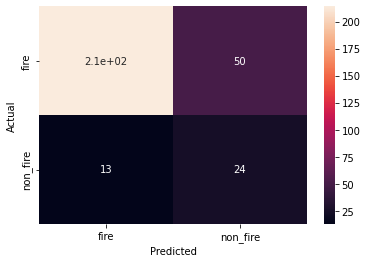

In [10]:

# Evaluación
prediction = clf.predict(vec_test)
# Visualizacion de resultados
cmat = metrics.confusion_matrix(prediction,label_test)
s = sns.heatmap(cmat,annot=True,xticklabels=labels, yticklabels=labels)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
#Se imprime el nivel de confianza
print('Accuracy: {0:5.2f}%'.format(acc*100))


import pickle

filename = "lbp_svm.sav"


pickle.dump(clf, open(filename, 'wb'))